# Taller 5.
## Analisis de Imagen
***
Oscar Eduardo Mejia  

201516790

In [188]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'angle', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Funciones Basicas

In [189]:
face = misc.face()

In [190]:
print(face)
print(face.shape, face.dtype)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ...
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ...
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ...
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
(768, 1024, 3) uint8


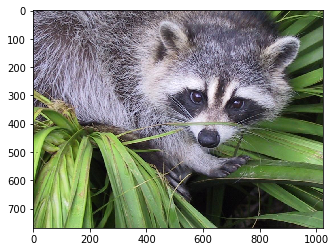

In [191]:
plt.imshow(face)

In [192]:
misc.imsave('face.png', face)

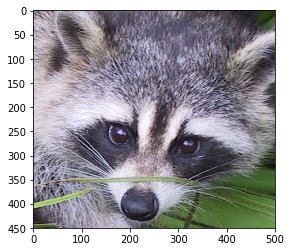

In [193]:
lx, ly = face.shape[0:2]
# Cropping
crop_face = face[50:500,400:900, :]
plt.imshow(crop_face)

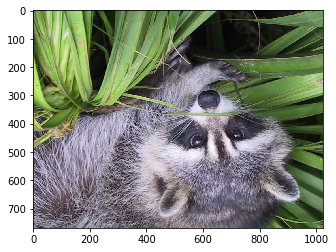

In [194]:
# Flip up - down
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

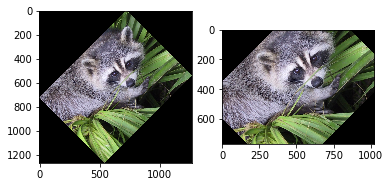

In [195]:
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.subplot(121)
plt.imshow(rotate_face)
plt.subplot(122)
plt.imshow(rotate_face_noreshape)

(-0.5, 1023.5, 767.5, -0.5)

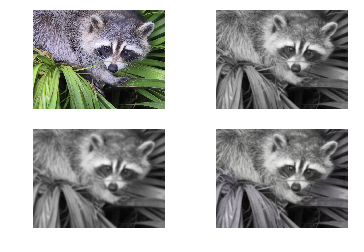

In [196]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred_face = ndimage.gaussian_filter(face, sigma=5)
local_mean_face = ndimage.uniform_filter(face, size=11)

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

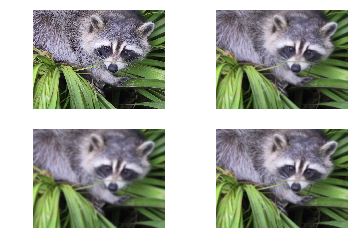

In [197]:

blurred_face = ndimage.gaussian_filter(face, sigma=(3, 3, 0))
very_blurred_face = ndimage.gaussian_filter(face, sigma=(5, 5, 0))
local_mean_face = ndimage.uniform_filter(face, size=(11, 11, 0))

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

In [198]:
from skimage import feature

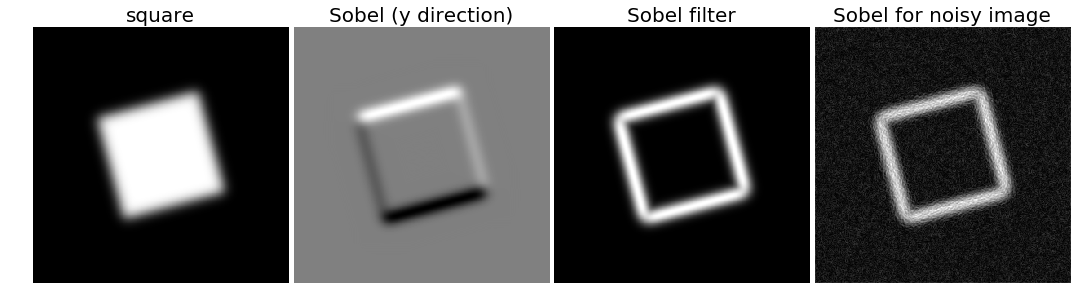

In [199]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 2

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 7)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (y direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im_noisy = im + 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im_noisy, axis=0, mode='constant')
sy = ndimage.sobel(im_noisy, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


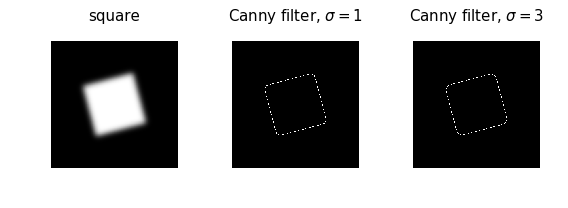

In [200]:

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

In [201]:
from skimage.transform import (hough_line, hough_line_peaks,      probabilistic_hough_line,hough_circle)

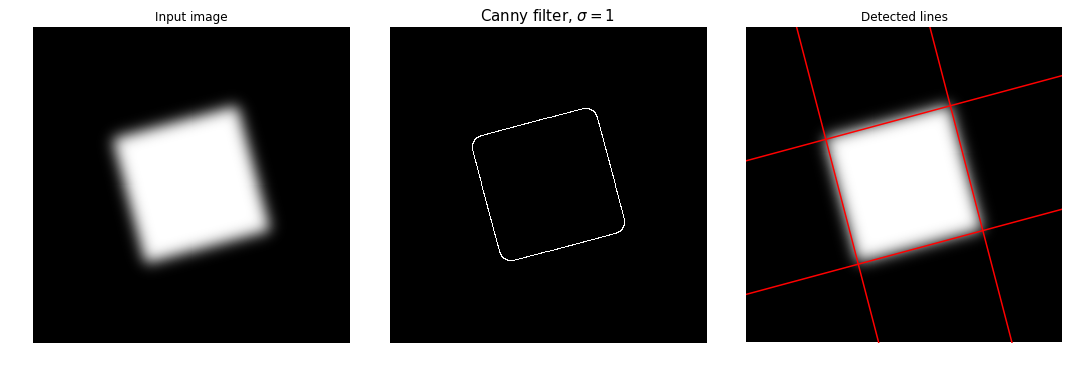

In [202]:
h, theta, d = hough_line(edges1)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges1, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Canny filter, $\sigma=1$', fontsize=15)

ax[2].imshow(im, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, im.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, im.shape[1]))
ax[2].set_ylim((im.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')
plt.tight_layout()
plt.show()

## Ejercicio 1
***
Se detecta el tamaño y la ubicacion del centro de una  **volva**

Inicialmente se carga la imagen

In [220]:
Im1 = pylab.imread("ves_full_150_002.jpg")

In [221]:
from PIL import Image, ImageFilter,ImageOps
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import data, color

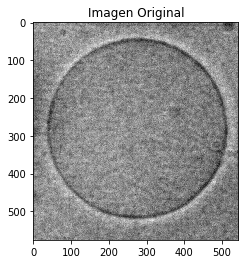

In [222]:
#Im1.show()
Im1=Im1[:,:,0]
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

Para este ejericcio se usa la transformada de Canny y la funcion Hough_circle. Esta ultima utiliza la transformada de Canny para calcular el radio, y el centro del circulo - o los circulos- que esten en la imagen. Adicionalmente para el calculo de la funcion de hough se da un rango de radio a analizar, es este caso se dio el vector [200, 275]

C:\Users\USER\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


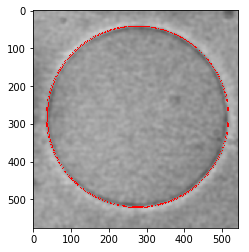

In [223]:
im_filtrada = ndimage.gaussian_filter(Im1, sigma=3)
hough_radii = np.arange(200, 275, 2)
edge = feature.canny(im_filtrada)
hough_res = hough_circle(edge,hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(im_filtrada)
x=0
y=0
radio=0
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (255, 0, 0)
    x=center_x
    y=center_y
    radio=radius

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

### Resultados

In [224]:
print("La posicion de centroide es ( %.1f, %.1f) y el diametro de la vesicula es %.1f pixeles" % (y,x,2*radio))

La posicion de centroide es ( 282.0, 277.0) y el diametro de la vesicula es 480.0 pixeles


In [209]:
import numpy as np
import cv2
from scipy.ndimage import label
import scipy.misc
from skimage.feature import peak_local_max

### Granulometria 1
***
Se debe  hacer un histograma del tamaño de grano de una metalografia.

Se debe iniciar cargando la imagen

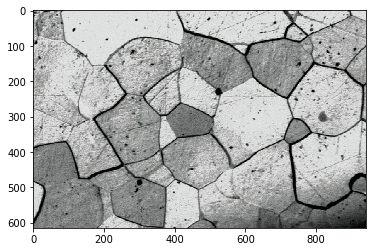

In [214]:
Im1 = cv2.imread("sv7247243.jpg")
imshow(Im1)

Siguiente a esto es necesario hacer un tratamiento a la imagen. Para esto se pasa de escala de colores a escala de grises, ya que eso facilita el calculo de la funcion *threshold*. Esta ultima permite la binarización de la imagen.

In [215]:
Im1_gray = cv2.cvtColor(Im1,cv2.COLOR_BGR2GRAY)

Para la granulometria se calculara el area de los granos, esto se realizara siguendo los siguientes pasas:  
1. Definir los contornos en base a la imagen bilateral.  
2. Calculo de area interno a estos contornos.  
3.  Y a partir de la distribucion de areas se grafica el histograma

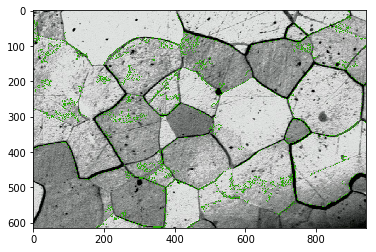

In [216]:
bf_im = cv2.bilateralFilter(Im1_gray,5,175,175)
edges=cv2.Canny(Im1_gray,75,200)
_,contorno,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour_list=[]
radios = []
imshow(Im1)
figure
z=100
for c in contorno:
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
    area =cv2.contourArea(c)
    if(area>z):
        radios.append(area)
    if ((len(approx)>8)& (len(approx)<23) & (area>z)) :
        contour_list.append(c)
cv2.drawContours(Im1,contour_list,-1,(42,171,6),0)
#cv2.imshow('Granos detectados',Im1)
#cv2.waitKey(0)
imshow(Im1)

<function matplotlib.pyplot.ion>

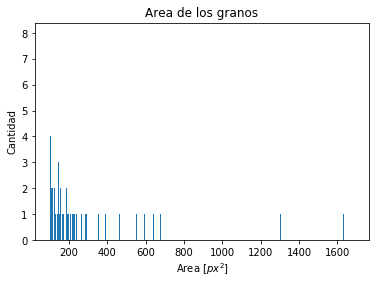

In [217]:
plt.hist(radios,bins=500)
plt.title('Area de los granos')
plt.xlabel('Area [$px^2$]')
plt.ylabel('Cantidad')
plt.ion

#### Problemas del metodo
Segun la resolucion de la imagen, y en especial la claridad de los bordes en la imagen original afectan en la capacidad de los algoritmos para determinar los bordes correctamente. En el caso anterior, el algoritmo reconoce bordes donde no hay y tambien caso contrario. Como se ve en la imagen con los contornos no se iguales a los del borde de grano (en este ejemplo se ven claramente)